<a href="https://colab.research.google.com/github/samipn/Pycaret/blob/main/05_anomaly_detection_synthetic_outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Anomaly Detection (Synthetic with Outliers) — PyCaret

# ✅ Enable GPU in Colab
*Runtime → Change runtime type → **T4 / L4 GPU** → Save.*  
Each notebook sets `use_gpu=True` in `setup()`. Models that support GPU (e.g., XGBoost, CatBoost) will leverage it automatically if available.

We generate a synthetic dataset and identify anomalies with Isolation Forest & IQR.

In [1]:
!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 7.1 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 20.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 163.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of flask to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 7.1 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of umap-learn to de

In [1]:
import numpy as np, pandas as pd
rng = np.random.RandomState(42)
# 2D blobs
n_inliers = 1500
inliers = rng.normal(loc=[0,0], scale=[2,2], size=(n_inliers,2))
# Inject outliers
n_outliers = 60
outliers = rng.uniform(low=-12, high=12, size=(n_outliers,2))
X = np.vstack([inliers, outliers])
df = pd.DataFrame(X, columns=['x1','x2'])
df.head()

,x1,x2
0,0.993428,-0.276529
1,1.295377,3.046060
2,-0.468307,-0.468274
3,3.158426,1.534869
4,-0.938949,1.085120


In [9]:
from pycaret.anomaly import setup, create_model, assign_model, plot_model, save_model, pull

s = setup(df, session_id=42, normalize=True, transformation=True)
iforest = create_model('iforest')
summary = pull(); print(summary)
# plot_model(iforest, plot='tsne')  # 2D viz - removed due to error
labeled = assign_model(iforest)
labeled['Anomaly'].value_counts()

,Description,Value
0,Session id,42
1,Original data shape,"(1560, 2)"
2,Transformed data shape,"(1560, 2)"
3,Numeric features,2
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Transformation,True
9,Transformation method,yeo-johnson


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

               Description                 Value
0               Session id                    42
1      Original data shape             (1560, 2)
2   Transformed data shape             (1560, 2)
3         Numeric features                     2
4               Preprocess                  True
5          Imputation type                simple
6       Numeric imputation                  mean
7   Categorical imputation                  mode
8           Transformation                  True
9    Transformation method           yeo-johnson
10               Normalize                  True
11        Normalize method                zscore
12                CPU Jobs                    -1
13                 Use GPU                 False
14          Log Experiment                 False
15         Experiment Name  anomaly-default-name
16                     USI                  9b93


,count
Anomaly,
0,1482
1,78


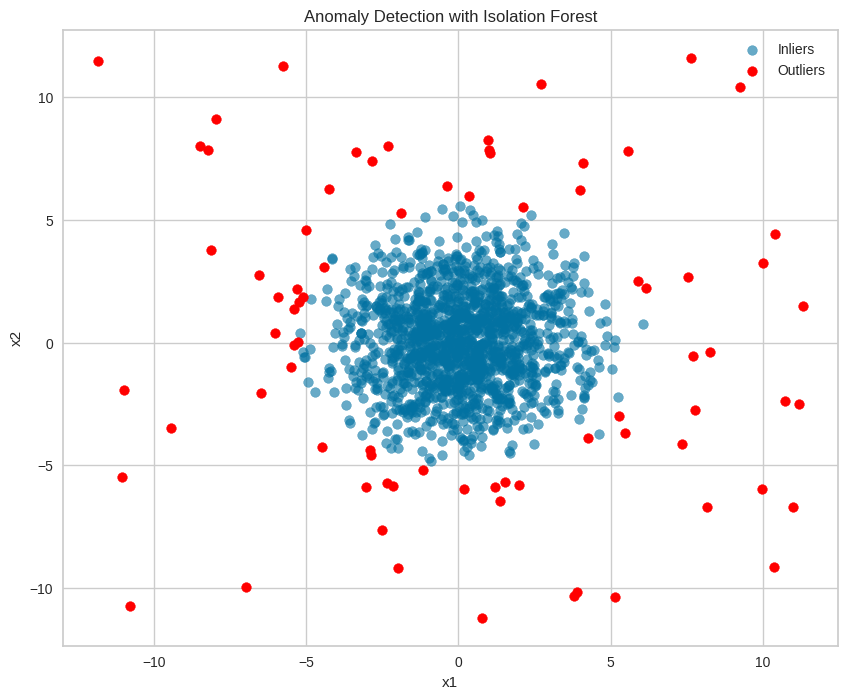

In [10]:
import matplotlib.pyplot as plt

# Separate inliers and outliers for plotting
inliers = labeled[labeled['Anomaly'] == 0]
outliers = labeled[labeled['Anomaly'] == 1]

# Create the scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(inliers['x1'], inliers['x2'], label='Inliers', alpha=0.6)
plt.scatter(outliers['x1'], outliers['x2'], label='Outliers', color='red')
plt.title('Anomaly Detection with Isolation Forest')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
save_model(iforest, 'iforest_model')
labeled.to_csv('anomaly_labeled.csv', index=False)
print("Saved anomaly_labeled.csv")

Transformation Pipeline and Model Successfully Saved
Saved anomaly_labeled.csv
